# Deep Learning Hands-On 2019
----
## Content

- DL Introduction
- Basic Regularization
  - *Early Stopping*
  - *Dropout*
  - *Weight Penalty*
  - *Normalization*
- Convolutional Neural Network
- Recurrent Neural Network
- Autoencoder **(CNN & RNN)**
  - *Denoising*
  - *U-Net*
  - *Variational*
- Implementations
  - Paper 1
  - Paper 2


## Import Libraries
----

In [0]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt

def show_number(data,true,pred):
  print(data.shape)
  print(len(data.shape))
  if len(data.shape) == 4:
    a,b,c, _ = data.shape
    data.shape = (a,b,c)
  else:
    pass
  f, ax = plt.subplots(4,4)
  f.set_size_inches(8,8)
  img_idx = 0
  for i in range(0,4):
    for j in range(0,4):
      ax[i][j].axis('off')
      ax[i][j].imshow(data[img_idx],cmap=plt.cm.binary)
      ax[i][j].set_title('True label: %d\nPred label: %d'%(true[img_idx],pred[img_idx]))
      img_idx += 1
  plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.25)
  plt.show()

def change_dim(data,to_):
  print()
  dim = len(data.shape)
  if to_ == 'cnn' and dim == 3:
    data = np.expand_dims(data, axis=3)
  elif to_ == 'rnn' and dim == 4:
    data = np.squeeze(data, axis=3)
  else:
    print('Data already on format or dimension fail')
  return data

Training xy:  (60000, 28, 28) (60000,)
Testing  xy:  (10000, 28, 28) (10000,)
(25, 28, 28)
3


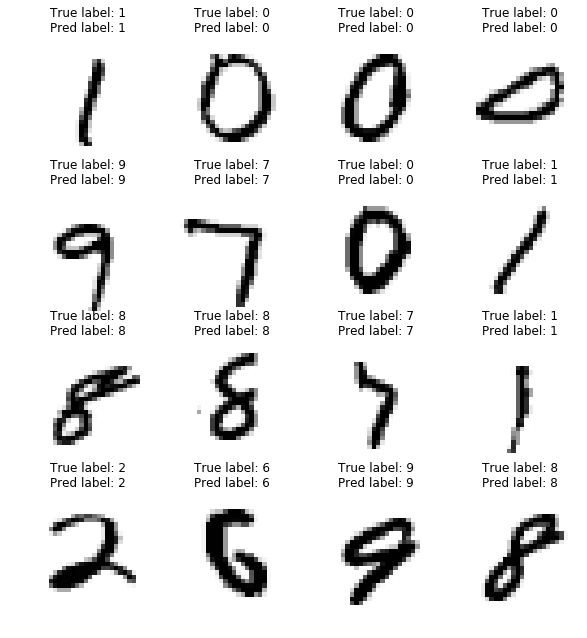

In [7]:
# Read the data
(train_images, train_labels), (test_images, test_labels) = K.datasets.mnist.load_data()
print('Training xy: ',train_images.shape,train_labels.shape)
print('Testing  xy: ',test_images.shape,test_labels.shape)
train_images = train_images / 255.
test_images  = test_images / 255.
rnd_idx = np.random.choice(len(test_labels),25)
show_number(test_images[rnd_idx], test_labels[rnd_idx], test_labels[rnd_idx])

## DL Introduction
---

## Regularization


[Are Deep Neural Networks Dramatically Overfitted?](https://lilianweng.github.io/lil-log/2019/03/14/are-deep-neural-networks-dramatically-overfitted.html)

---

### Early Stopping

### Dropout

### Weight Penalty

### Normalization

### Grid Search

In [0]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
  # create model
  model = K.Sequential()
  model.add(K.layers.Flatten(input_shape=(28,28)))
  model.add(K.layers.Dense(128, activation='relu'))
  model.add(K.layers.Dense(10, activation='softmax'))
  # Compile model
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [16, 32]
epochs = [1, 3, 5]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=1)
grid_result = grid.fit(test_images, test_labels)


In [18]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
   print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.934300 using {'batch_size': 16, 'epochs': 5}
0.902200 (0.024573) with: {'batch_size': 16, 'epochs': 1}
0.924100 (0.015200) with: {'batch_size': 16, 'epochs': 3}
0.934300 (0.009444) with: {'batch_size': 16, 'epochs': 5}
0.898700 (0.019130) with: {'batch_size': 32, 'epochs': 1}
0.920400 (0.013593) with: {'batch_size': 32, 'epochs': 3}
0.929800 (0.012406) with: {'batch_size': 32, 'epochs': 5}


## Convolutional Neural Network
---


## Reccurent Neural Networks
---

## Autoencoder
---

### Sparse AE

### VAE

### U-Net

## Paper 1

In [0]:
!pip install keras
!pip install keras-tcn

In [0]:
from keras import Input as k_Input
from keras import Model as k_Model
import keras.layers as kl
from tcn import TCN
xi = k_Input(shape=(28,28))

xn = TCN(nb_filters = 32,
         kernel_size=3,
         dilations=[2,4,8],
         nb_stacks=1,
         dropout_rate=0.5,
         activation='relu',
         return_sequences=False)(xi)
xn = kl.Dense(64, activation='relu')(xn)
xo = kl.Dense(10, activation='softmax')(xn)

model = k_Model(inputs=[xi], outputs=[xo])
print(model.summary())

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.fit(  x = train_images,
            y = train_labels, 
            epochs=5, 
            batch_size=32, 
            shuffle=True,
            verbose=0)

## Paper 2

In [0]:
!git clone https://github.com/titu1994/LSTM-FCN.git
!cd  LSTMFCN

In [0]:
from LSTMFCN.all_datasets_training import generate_lstmfcn
from LSTMFCN.all_datasets_training import generate_alstmfcn

In [0]:
print('LSTM and FCN')
model = generate_lstmfcn(MAX_SEQUENCE_LENGTH=28*28, NB_CLASS=10, NUM_CELLS=8)

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.fit(  x = train_images.reshape(-1,1,28*28),
            y = train_labels, 
            epochs=5, 
            batch_size=32, 
            shuffle=True,
            verbose=2)

In [0]:
model = generate_alstmfcn(MAX_SEQUENCE_LENGTH=28*28, NB_CLASS=10, NUM_CELLS=8)

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.fit(  x = train_data[0].reshape(-1,1,28*28),
            y = train_data[1], 
            epochs=5, 
            batch_size=32, 
            shuffle=True,
            validation_data = (test_data[0].reshape(-1,1,28*28),test_data[1]),
            verbose=2)

## Thanks